In [55]:
# mieyhgnaj set 🤪

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno
import plotly.express as px
from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

import warnings
warnings.filterwarnings("ignore")

In [62]:
# server = pd.read_csv('df_result_kmeans.csv', index_col=0)
# server

In [59]:
# df_result = pd.concat([server, df_result]).reset_index(drop=True)
# df_result

In [1]:
# df_result = pd.DataFrame(columns=['algorithm', 'confusion_matrix', 'sampler', 'scale'])
df_result = pd.read_csv('df_result_kmeans_local.csv', index_col=0)
df_result

,algorithm,confusion_matrix,sampler,scale
0,"DecisionTreeClassifier(class_weight={0: 0.03, ...","[array([2355, 759]), array([5, 2])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
1,"DecisionTreeClassifier(class_weight={0: 0.01, ...","[array([1789, 1325]), array([5, 2])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
2,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([1977, 1137]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
3,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([1977, 1137]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
4,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([2021, 1093]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
5,"LogisticRegression(C=0.001, class_weight='bala...","[array([ 861, 2253]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
6,"LogisticRegression(C=0.001, class_weight='bala...","[array([ 860, 2254]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
7,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([3114, 0]), array([7, 0])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
8,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([ 585, 2529]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
9,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([2463, 651]), array([2, 5])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN


# 2. train_out_filled_kmeans.csv

In [118]:
train = pd.read_csv('datas/csv/train_out_filled_kmeans.csv', index_col=0)
test = pd.read_csv('datas/csv/test_encode_ver2.csv', index_col=0)

In [119]:
X_train = train.drop(columns=['fraud_YN'])
X_test = test.drop(columns=['fraud_YN'])
y_train = train.fraud_YN
y_test = test.fraud_YN

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12879, 50), (3121, 50), (12879,), (3121,))

In [120]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import make_scorer

In [121]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()
nm = Normalizer()

In [114]:
# encoding ver.
categorical_features = [0, 1, 2, 3, 4, 5, 6,
                        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
                        45, 46, 47, 48, 49]

In [122]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import plot_confusion_matrix

# smotenc + algorithm => score + confusion_matrix 출력 함수
def get_result(model, X_train, y_train, X_test, y_test, scale=None):
    # over-sampling
    smotenc = SMOTENC(categorical_features=categorical_features,
                                   random_state=4)
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

    # scaling
    if scale!=None:
        X_resampled[['x14','x15']] = scale.fit_transform(X_resampled[['x14','x15']])
        X_test[['x14','x15']] = scale.transform(X_test[['x14','x15']])
        
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_test)
    
    # result 출력
    print("√", model, "\n------------------------------------------------------")
    print("Accuracy: ", balanced_accuracy_score(y_test, pred), "\n------------------------------------------------------")
    print(classification_report_imbalanced(y_test, pred, digits=6), "\n")
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization \n", None),
                      ("Normalized confusion matrix \n", 'true')]

    # save result
    matrix = confusion_matrix(y_test, pred)
    global df_result
    df_result = df_result.append({'algorithm':model, 'confusion_matrix':[matrix[0],matrix[1]]
                                  , 'sampler':smotenc ,'scale':scale}, ignore_index=True)
    
    #train
    for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(4.4,4.4))
        plt.rcParams.update({'font.size': 14})
        disp = plot_confusion_matrix(model, X_resampled, y_resampled,
                                     display_labels=['fraud_N', 'fraud_Y'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize, ax=ax)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    # test
    for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(4.4,4.4))
        plt.rcParams.update({'font.size': 14})
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=['fraud_N', 'fraud_Y'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize, ax=ax)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
    
    plt.show()

√ SVC(C=5, coef0=1, kernel='poly', random_state=4) 
------------------------------------------------------
Accuracy:  0.435750986329021 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997363  0.728645  0.142857  0.842086  0.322633  0.110190      3114
          1   0.001182  0.142857  0.728645  0.002345  0.322633  0.097995         7

avg / total   0.995128  0.727331  0.144171  0.840202  0.322633  0.110162      3121
 

Confusion matrix, without normalization 

[[ 4118  8727]
 [ 1647 11198]]
Normalized confusion matrix 

[[0.32059167 0.67940833]
 [0.1282211  0.8717789 ]]
Confusion matrix, without normalization 

[[2269  845]
 [   6    1]]
Normalized confusion matrix 

[[0.72864483 0.27135517]
 [0.85714286 0.14285714]]


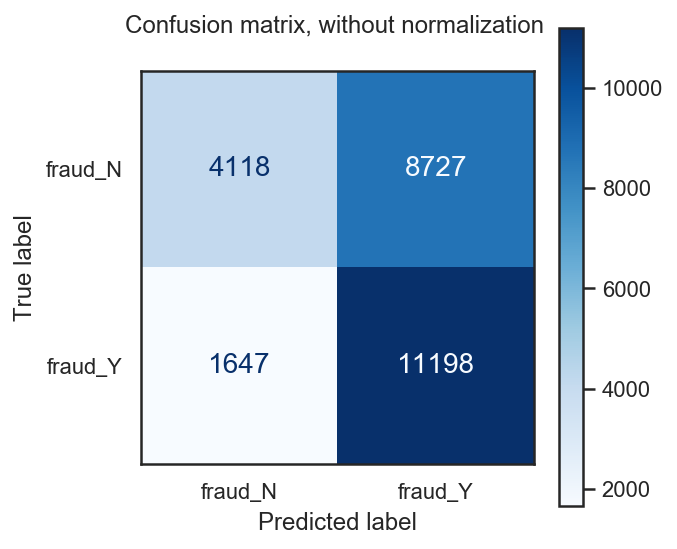

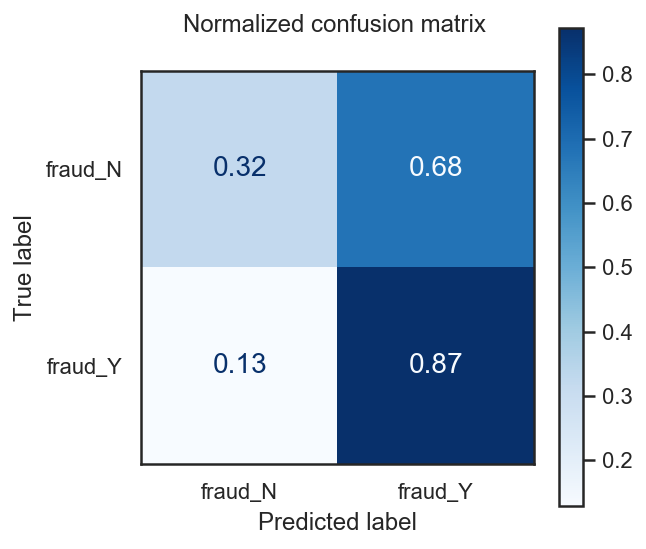

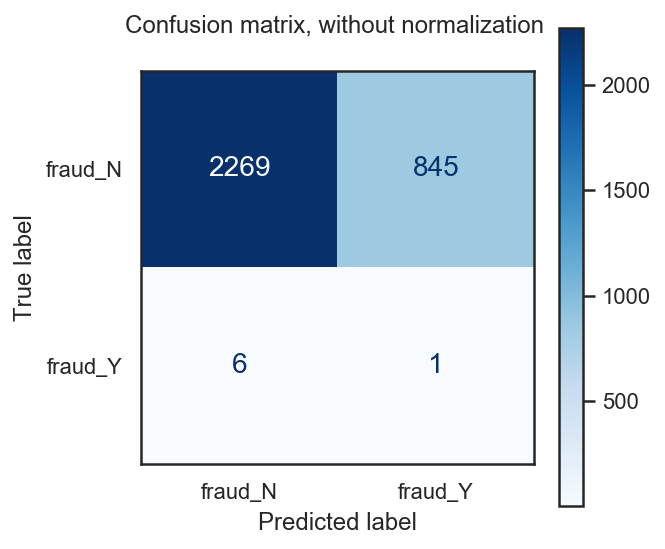

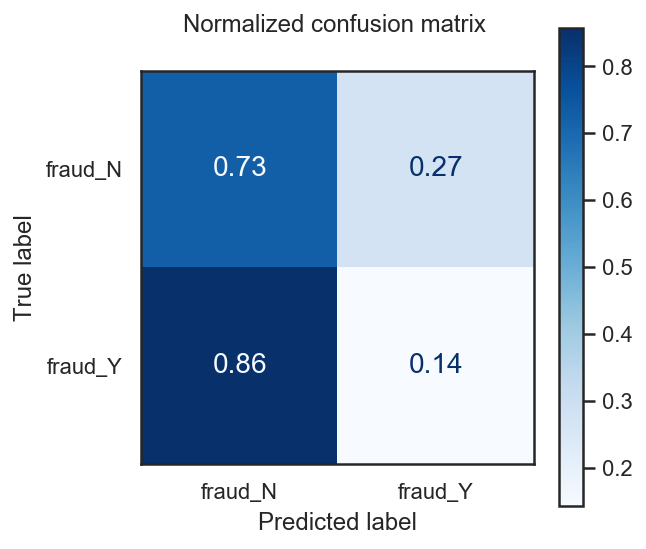

In [90]:
from sklearn.svm import SVC

model = SVC(kernel="poly", degree=3, coef0=1, C=5, random_state=4)
get_result(model, X_train, y_train, X_test, y_test)

√ RandomForestClassifier(n_jobs=-1, random_state=4) 
------------------------------------------------------
Accuracy:  0.5 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997757  1.000000  0.000000  0.998877  0.000000  0.000000      3114
          1   0.000000  0.000000  1.000000  0.000000  0.000000  0.000000         7

avg / total   0.995519  0.997757  0.002243  0.996637  0.000000  0.000000      3121
 

Confusion matrix, without normalization 

[[12845     0]
 [    0 12845]]
Normalized confusion matrix 

[[1. 0.]
 [0. 1.]]
Confusion matrix, without normalization 

[[3114    0]
 [   7    0]]
Normalized confusion matrix 

[[1. 0.]
 [1. 0.]]


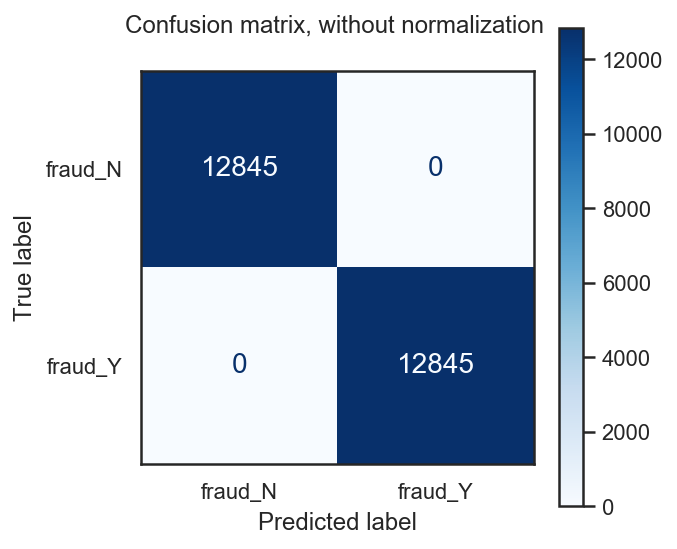

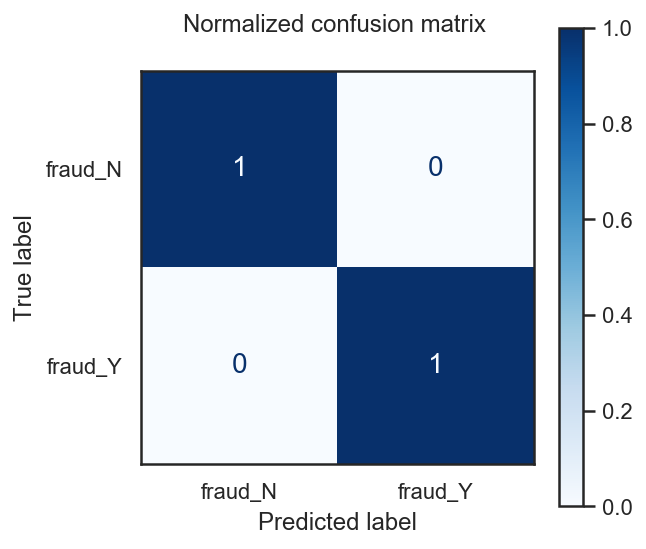

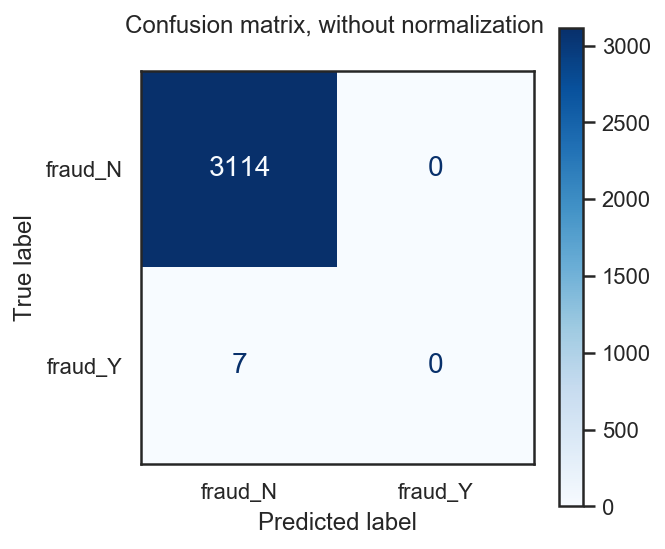

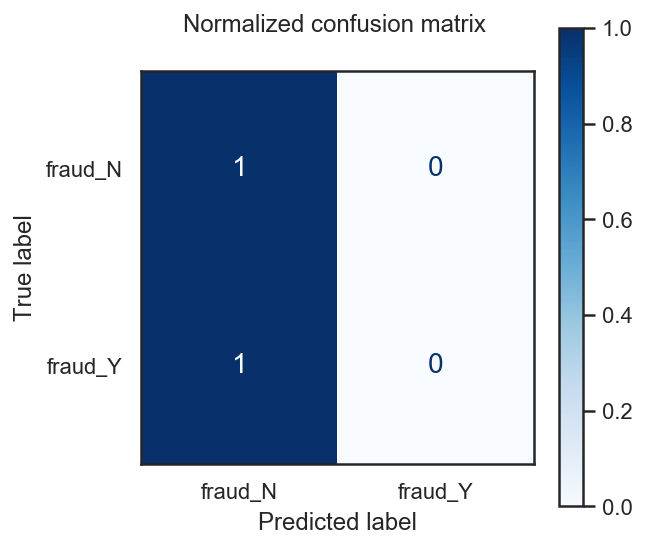

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=5,
                               min_samples_split=30, min_samples_leaf=5,
                               max_leaf_nodes=4, max_features=18,
                               class_weight={0: 0.5, 1: 1.4}, random_state=4,
                               n_jobs=-1)
get_result(model, X_train, y_train, X_test, y_test)

√ DecisionTreeClassifier(class_weight={0: 0.03, 1: 9}, max_depth=7,
                       max_features=15, max_leaf_nodes=200, min_samples_leaf=5,
                       min_samples_split=20, random_state=4) 
------------------------------------------------------
Accuracy:  0.454697678686118 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997493  0.766538  0.142857  0.866897  0.330916  0.116335      3114
          1   0.001374  0.142857  0.766538  0.002721  0.330916  0.102676         7

avg / total   0.995259  0.765139  0.144256  0.864958  0.330916  0.116304      3121
 

Confusion matrix, without normalization 

[[2387  727]
 [   6    1]]
Normalized confusion matrix 

[[0.76653821 0.23346179]
 [0.85714286 0.14285714]]


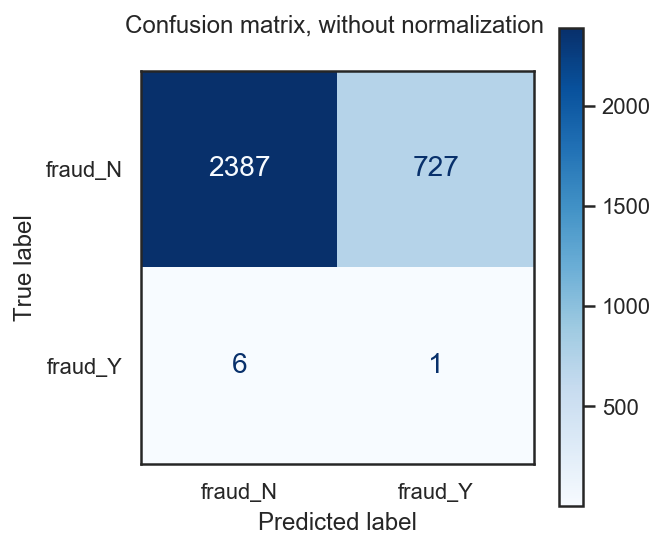

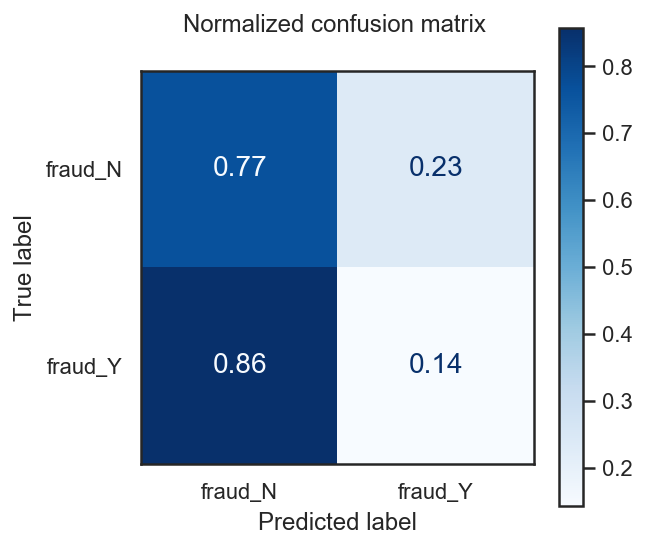

In [23]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight={0: 0.03, 1: 9}, max_depth=7,
                               max_features=15, max_leaf_nodes=200, min_samples_leaf=5,
                               min_samples_split=20, random_state=4)
get_result(model, X_train, y_train, X_test, y_test)

In [95]:
smotenc = SMOTENC(categorical_features=categorical_features,
                                   random_state=4)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

√ LogisticRegression(C=10, class_weight={0: 0.2, 1: 2.0}, max_iter=200, n_jobs=-1,
                   random_state=4, solver='liblinear', tol=0.001) 
------------------------------------------------------
Accuracy:  0.4910312872740618 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997436  0.124920  0.857143  0.222032  0.327222  0.099234      3114
          1   0.002197  0.857143  0.124920  0.004383  0.327222  0.114914         7

avg / total   0.995204  0.126562  0.855501  0.221544  0.327222  0.099269      3121
 

Confusion matrix, without normalization 

[[    0 12845]
 [    0 12845]]
Normalized confusion matrix 

[[0. 1.]
 [0. 1.]]
Confusion matrix, without normalization 

[[ 389 2725]
 [   1    6]]
Normalized confusion matrix 

[[0.12491972 0.87508028]
 [0.14285714 0.85714286]]


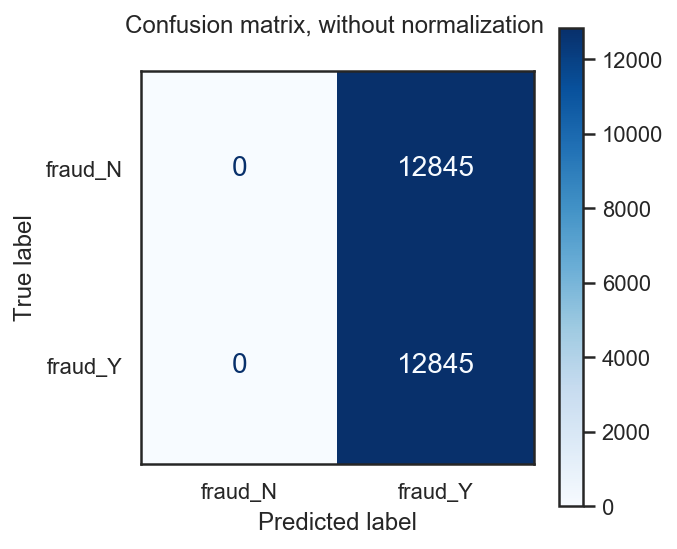

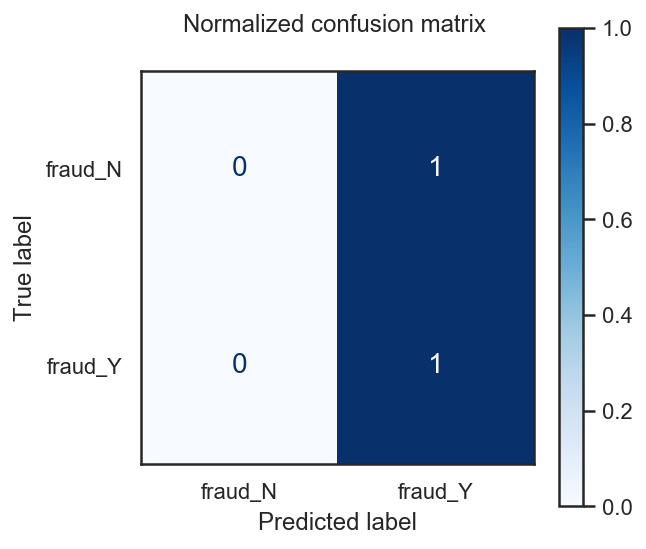

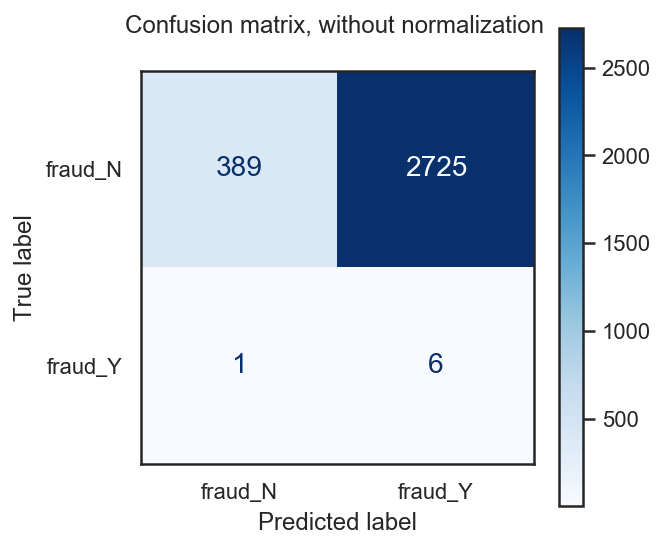

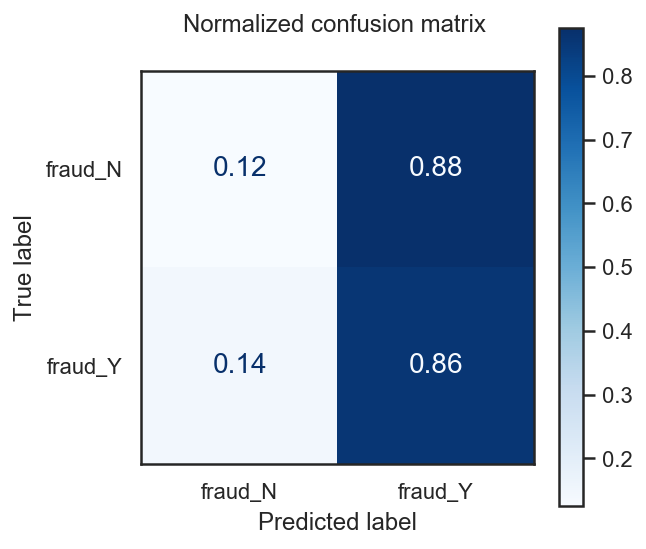

In [123]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10, class_weight={0:0.2, 1:2.0}, max_iter=200,
                           n_jobs=-1, random_state=4, solver='liblinear', tol=0.001)
get_result(model, X_train, y_train, X_test, y_test, scale=None)

√ LogisticRegression(C=10, class_weight={0: 0.2, 1: 2.0}, max_iter=200, n_jobs=-1,
                   random_state=4, solver='liblinear', tol=0.001) 
------------------------------------------------------
Accuracy:  0.49516010643178276 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.997732  0.847463  0.142857  0.916479  0.347946  0.129597      3114
          1   0.002101  0.142857  0.847463  0.004141  0.347946  0.112536         7

avg / total   0.995498  0.845883  0.144437  0.914432  0.347946  0.129558      3121
 

Confusion matrix, without normalization 

[[10334  2511]
 [   17 12828]]
Normalized confusion matrix 

[[0.80451538 0.19548462]
 [0.00132347 0.99867653]]
Confusion matrix, without normalization 

[[2639  475]
 [   6    1]]
Normalized confusion matrix 

[[0.84746307 0.15253693]
 [0.85714286 0.14285714]]


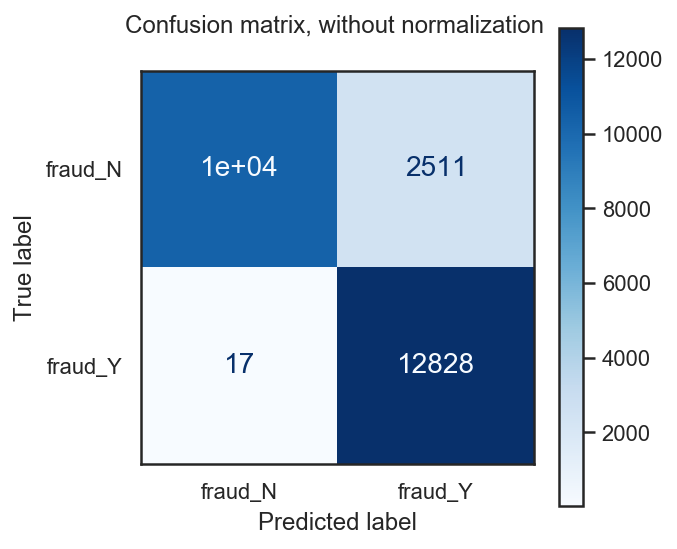

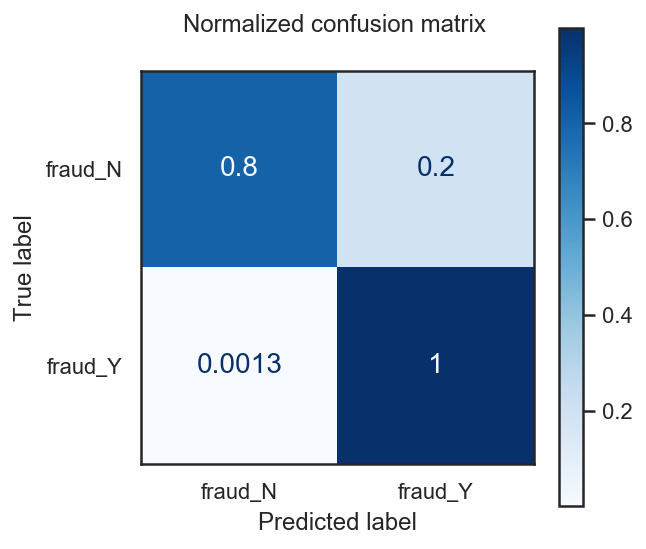

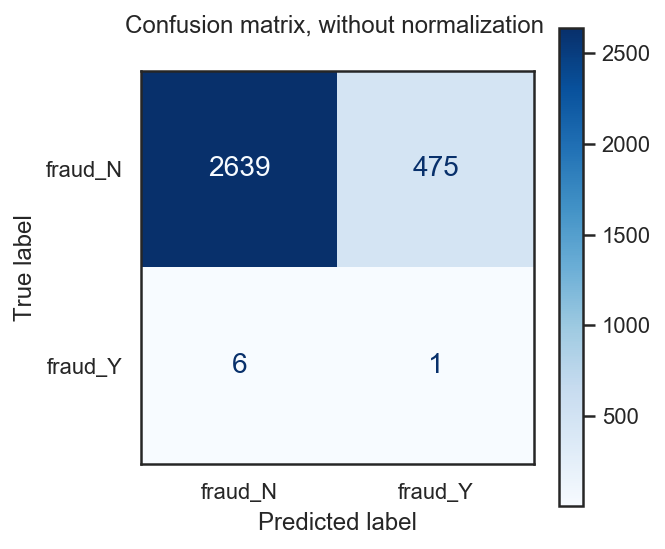

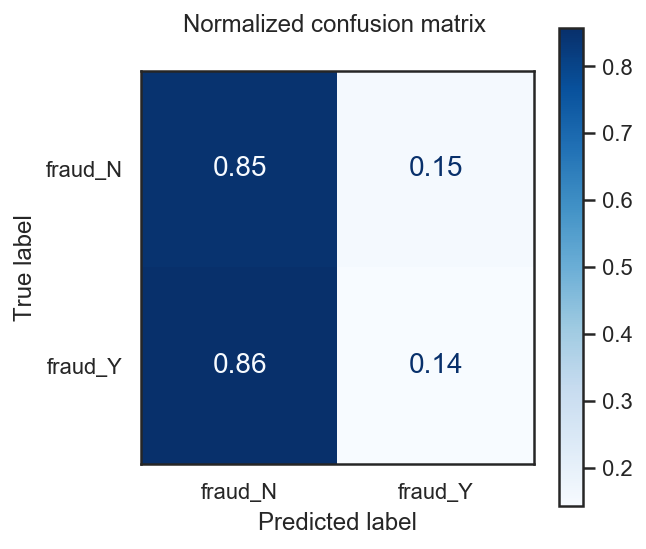

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10, class_weight={0:0.2, 1:2.0}, max_iter=200,
                           n_jobs=-1, random_state=4, solver='liblinear', tol=0.001)
get_result(model, X_train, y_train, X_test, y_test, scale=ss)

√ RandomForestClassifier(class_weight={0: 0.5, 1: 1.4}, max_depth=7,
                       max_features=17, max_leaf_nodes=4, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=4) 
------------------------------------------------------
Accuracy:  0.5387879621983668 
------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

          0   0.998025  0.649004  0.428571  0.786534  0.527394  0.284276      3114
          1   0.002737  0.428571  0.649004  0.005440  0.527394  0.272014         7

avg / total   0.995792  0.648510  0.429066  0.784782  0.527394  0.284249      3121
 

Confusion matrix, without normalization 

[[ 8439  4406]
 [   11 12834]]
Normalized confusion matrix 

[[6.56987155e-01 3.43012845e-01]
 [8.56364344e-04 9.99143636e-01]]
Confusion matrix, without normalization 

[[2021 1093]
 [   4    3]]
Normal

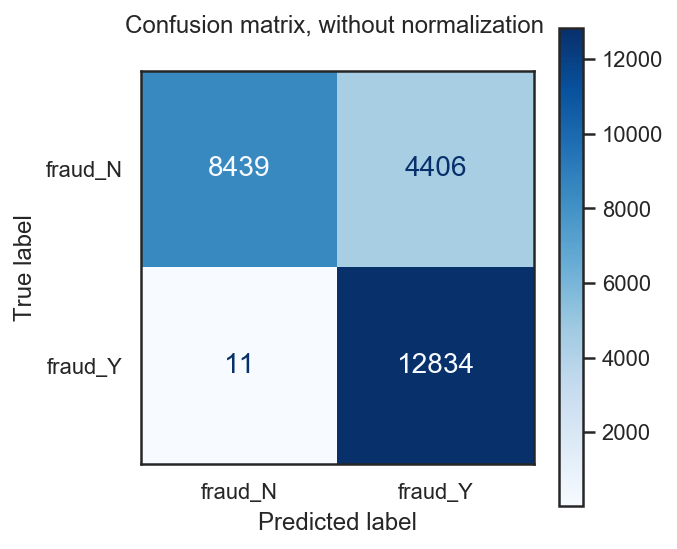

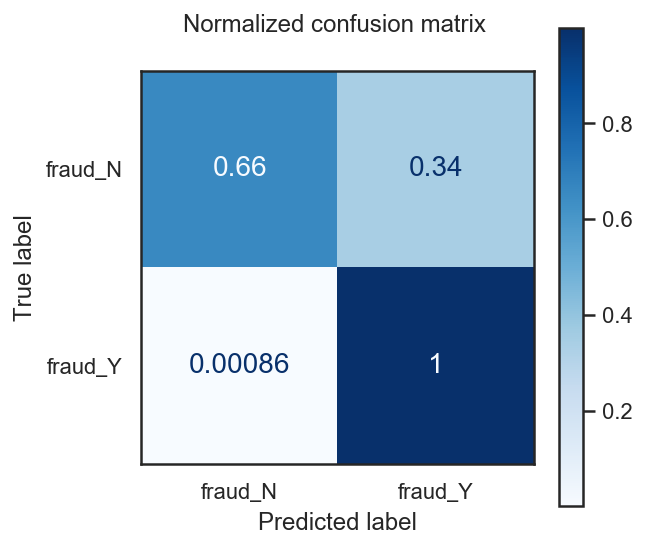

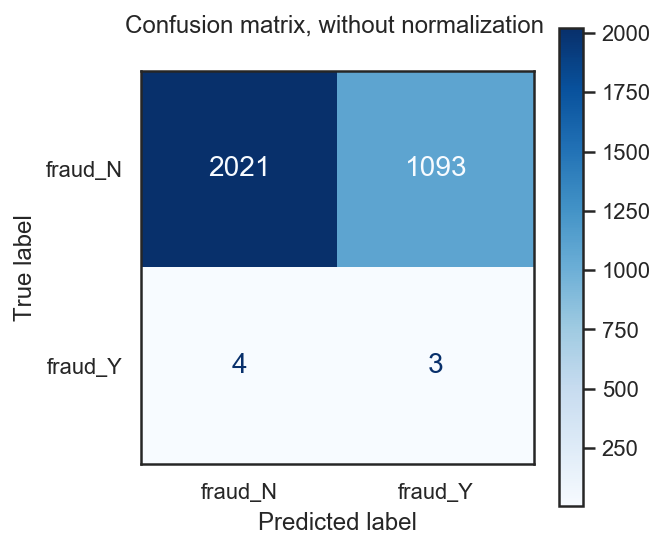

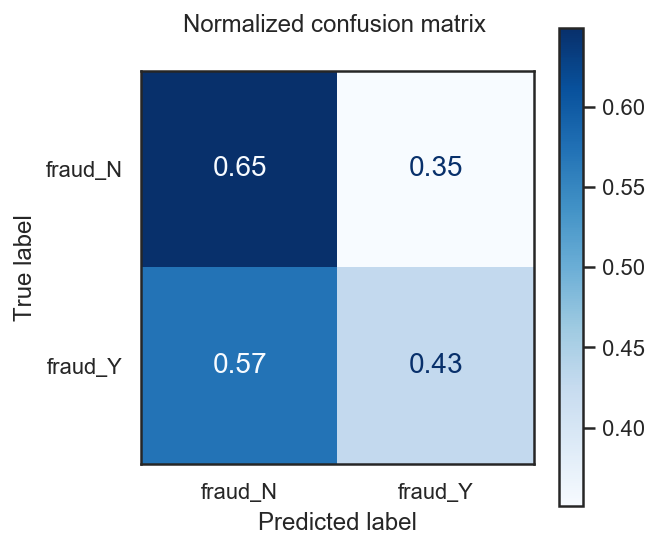

In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight={0: 0.5, 1: 1.4}, max_depth=7,
                               max_features=17, max_leaf_nodes=4, min_samples_leaf=5,
                               min_samples_split=30, n_estimators=500, n_jobs=-1,
                               oob_score=True, random_state=4)
get_result(model, X_train, y_train, X_test, y_test)

In [107]:
pre = model.predict(X_resampled)
cm_train = confusion_matrix(y_resampled, pre)

In [109]:
model.oob_score_

0.8294277929155314

In [108]:
cm_train

array([[ 8439,  4406],
       [   11, 12834]])

In [105]:
df_result.loc[4]['algorithm']

'RandomForestClassifier(class_weight={0: 0.5, 1: 1.4}, max_depth=7,\n                       max_features=17, max_leaf_nodes=4, min_samples_leaf=5,\n                       min_samples_split=30, n_estimators=500, n_jobs=-1,\n                       oob_score=True, random_state=4)'

In [117]:
df_result

,algorithm,confusion_matrix,sampler,scale
0,"DecisionTreeClassifier(class_weight={0: 0.03, ...","[array([2355, 759]), array([5, 2])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
1,"DecisionTreeClassifier(class_weight={0: 0.01, ...","[array([1789, 1325]), array([5, 2])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
2,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([1977, 1137]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
3,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([1977, 1137]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
4,"RandomForestClassifier(class_weight={0: 0.5, 1...","[array([2021, 1093]), array([4, 3])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
5,"LogisticRegression(C=0.001, class_weight='bala...","[array([ 861, 2253]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
6,"LogisticRegression(C=0.001, class_weight='bala...","[array([ 860, 2254]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
7,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([3114, 0]), array([7, 0])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
8,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([ 585, 2529]), array([1, 6])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN
9,"LogisticRegression(C=0.01, class_weight={0: 0....","[array([2463, 651]), array([2, 5])]","SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5...",NaN


In [61]:
df_result.to_csv('df_result_kmeans_local.csv')